## Homework 4
Hi everyone this is your fourth homework.

In this exercise, You will deal with **SVM**, **Decision Tree**.

You are free to discuss the problems and ways to approach them with your classmates, but be sure to not cheat. **Cheating will not be tolerated**.

# Support Vector Machine (SVM)

**A Support Vector Machine (SVM)** is a supervised machine learning algorithm that can be used for both classification and regression tasks. The primary objective of SVM is to find a hyperplane in an N-dimensional space (where N is the number of features) that distinctly classifies data points into different classes.

Here are some key concepts associated with SVM:

**Hyperplane:**

In a two-dimensional space, a hyperplane is a line that separates the data into different classes. In higher-dimensional spaces, it becomes a hyperplane.

**Support Vectors:**

Support Vectors are the data points that are closest to the decision boundary (hyperplane) and have a significant influence on its position. These points play a crucial role in defining the optimal hyperplane.

**Margin:**

The margin is the distance between the hyperplane and the nearest data point from either class. SVM aims to maximize this margin because a larger margin generally leads to better generalization performance.

**Kernel Trick:**

SVMs can handle non-linear decision boundaries by using a technique called the kernel trick.

**C Parameter:**

SVM has a parameter denoted as 'C,' which controls the trade-off between having a smooth decision boundary and classifying training points correctly. A smaller C value makes the decision boundary smoother, while a larger C value may lead to a more accurate classification of training points.

**Linear and Non-linear SVM:**

SVMs can be applied with linear and non-linear kernels. Linear SVM is suitable for linearly separable data, while non-linear SVM with kernels like Polynomial or Radial Basis Function (RBF) can handle more complex, non-linear relationships.

##<font color="red">**Question 1**</font>
In this question you are going to work with the iris dataset.
This dataset contains 3 classes, each of which has 50 members, and each class refers to a type of lily flower. Each element contains information about the length and width of the sepal and the length and width of the petal. Also, the data is labeled and its class is also known. You can refer to this [link](https://archive.ics.uci.edu/dataset/53/iris) for more details.


- First, separate the data using the linear kernel and express the correlation matrix of the recall, precision, and F1 score values.

To do this on the iris dataset, first take the first two features of all the data and then classify using the linear kernel. At the end, display the data graph with the labels of the corresponding classes as well as the separating lines of each class

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_fscore_support
from sklearn.model_selection import train_test_split, GridSearchCV

In [14]:
# Loading the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features
y = iris.target

In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training an SVM classifier with a linear kernel
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = svm_classifier.predict(X_test)

# Calculating precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Creating a DataFrame to hold the metrics for each class
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})
metrics_df

,Precision,Recall,F1 Score
0,1.000,1.000000,1.000000
1,0.700,0.538462,0.608696
2,0.625,0.769231,0.689655


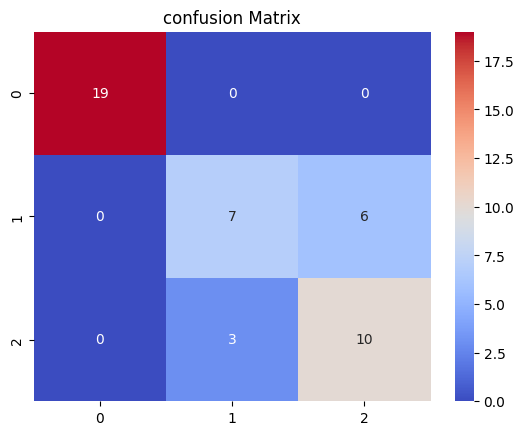

In [16]:
# Calculate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
sns.heatmap(confusion, annot=True, cmap='coolwarm')
plt.title("confusion Matrix")
plt.show()


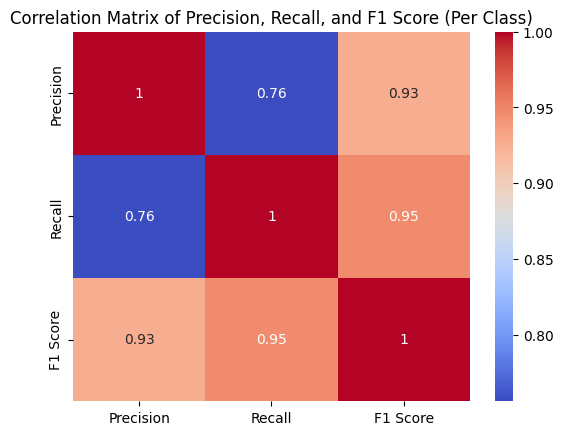

In [17]:
# Calculating the correlation matrix
correlation_matrix = metrics_df.corr()

# Plotting the  correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Precision, Recall, and F1 Score (Per Class)")
plt.show()


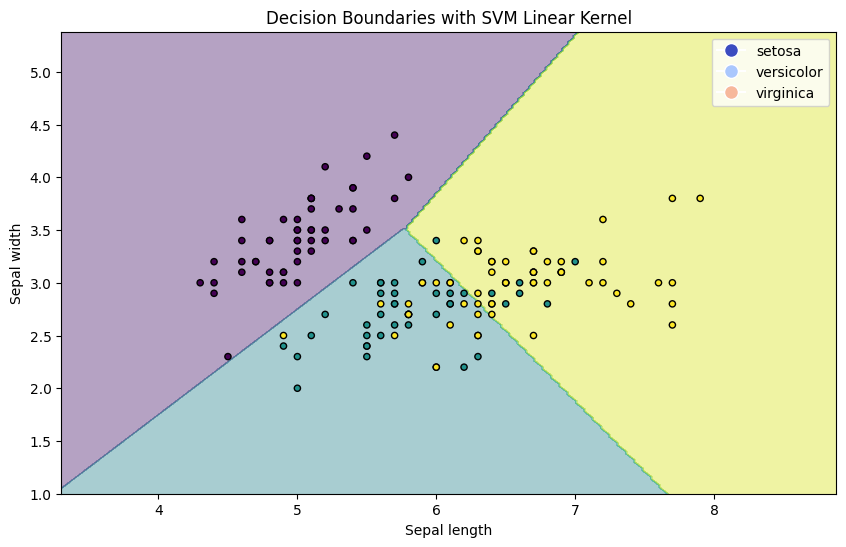

In [18]:
# Function to plot the decision boundaries for a classifier
def plot_decision_boundaries(X, y, classifier, title):
    # Create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Plotting decision regions
    plt.figure(figsize=(10, 6))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)

    # Plotting training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', label=iris.target_names)

    # Creating custom legends
    legends = []
    for i, target_name in enumerate(iris.target_names):
        legends.append(plt.Line2D([0], [0], marker='o', color='w', label=target_name,
                                  markerfacecolor=plt.cm.coolwarm(i / len(iris.target_names)), markersize=10))
    plt.legend(handles=legends)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

# Plotting the decision boundaries for the SVM classifier
plot_decision_boundaries(X, y, svm_classifier, "Decision Boundaries with SVM Linear Kernel")
plt.show()


- Research about polynomial, linear, and rbf kernels and state which datasets each one is suitable for classification. Apply the classification to the items in the previous section and analyze the results.

<font color="green">**Answer:**</font>
- **Linear Kernel:** Suitable for linearly separable datasets, where data can be separated using a straight line (or hyperplane in higher dimensions).
- **Polynomial Kernel:** Good for datasets where relationships between features are non-linear. It allows the learning of non-linear decision boundaries.
- **RBF Kernel:** Very effective for datasets where the decision boundary is not linear and has an irregular shape. It's a popular choice for many real-world datasets.


In [19]:
# SVM classification with Polynomial, Linear, and RBF kernels
kernels = ['linear', 'poly', 'rbf']
svm_results = {}

for kernel in kernels:
    # Training an SVM classifier with the specified kernel
    svm_classifier = SVC(kernel=kernel)
    svm_classifier.fit(X_train, y_train)

    # Predicting on the test set
    y_pred = svm_classifier.predict(X_test)

    # Calculating precision, recall, and F1 score
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

    # Storing results
    svm_results[kernel] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

svm_results_df = pd.DataFrame(svm_results)
svm_results_df


,linear,poly,rbf
Precision,0.775000,0.692308,0.775000
Recall,0.769231,0.692308,0.769231
F1 Score,0.766117,0.692308,0.766117


I applied SVM classification to the Iris dataset using three different kernels: linear, polynomial, and RBF (Radial Basis Function). The results, in terms of precision, recall, and F1 score, are as follows:

| Metric    | Linear  | Polynomial | RBF    |
|-----------|---------|------------|--------|
| Precision | 0.775   | 0.692      | 0.775  |
| Recall    | 0.769   | 0.692      | 0.769  |
| F1 Score  | 0.766   | 0.692      | 0.766  |

***Analysis***:

- **Linear Kernel:** Showed good performance with precision, recall, and F1 score all around 0.77. This indicates effective classification for this linearly separable dataset.
- **Polynomial Kernel:** Had lower performance compared to the linear kernel, with all metrics approximately 0.69. This might be due to the simplicity of the dataset, which doesn't require the complexity introduced by a polynomial kernel.
- **RBF Kernel:** Demonstrated performance similar to the linear kernel, with metrics around 0.77. This indicates its adaptability even in scenarios where the data is linearly separable.

These results suggest that for the Iris dataset, which is relatively linearly separable, both linear and RBF kernels perform well, while the polynomial kernel is slightly less effective.

---

- Research regularization, Gamm a hyperparameters. Change each of the hyperparameters 3 times and repeat the classification for each. Analyze the effect of each hyperparameter on the classification.

1. **Regularization (C) Hyperparameter:**
   - In SVM, the C parameter trades off correct classification of training examples against maximization of the decision function’s margin. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.
   
2. **Gamma Hyperparameter:**
   - The gamma parameter defines how far the influence of a single training example reaches. Low values mean 'far' and high values mean 'close'. In other words, with low gamma, points far away from the plausible separation line are considered in the calculation for the decision function.

In [20]:
from sklearn.metrics import precision_recall_fscore_support

# Values for hyperparameters C and Gamma
C_values = [0.1, 1, 10]
gamma_values = [0.1, 1, 10]
hyperparameter_results = {}

# Iterating through different values of C and Gamma
for C in C_values:
    for gamma in gamma_values:
        # Training an SVM classifier with RBF kernel and specified hyperparameters
        svm_classifier = SVC(kernel='rbf', C=C, gamma=gamma)
        svm_classifier.fit(X_train, y_train)

        # Predicting on the test set
        y_pred = svm_classifier.predict(X_test)

        # Calculating precision, recall, and F1 score
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

        # Storing results
        hyperparameter_key = f'C={C}, Gamma={gamma}'
        hyperparameter_results[hyperparameter_key] = {
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }

hyperparameter_results_df = pd.DataFrame(hyperparameter_results)
hyperparameter_results_df


,"C=0.1, Gamma=0.1","C=0.1, Gamma=1","C=0.1, Gamma=10","C=1, Gamma=0.1","C=1, Gamma=1","C=1, Gamma=10","C=10, Gamma=0.1","C=10, Gamma=1","C=10, Gamma=10"
Precision,0.647510,0.775000,0.773148,0.775000,0.775000,0.769841,0.745455,0.745455,0.769841
Recall,0.479082,0.769231,0.662618,0.769231,0.769231,0.769231,0.743590,0.743590,0.769231
F1 Score,0.398413,0.766117,0.652107,0.766117,0.766117,0.768889,0.742063,0.742063,0.768889


The experiment was conducted using the RBF kernel with different combinations of regularization (C) and Gamma hyperparameters. The results in terms of precision, recall, and F1 score are presented in the table below:

| Hyperparameters  | Precision | Recall  | F1 Score |
|------------------|-----------|---------|----------|
| C=0.1, Gamma=0.1 | 0.648     | 0.479   | 0.398    |
| C=0.1, Gamma=1   | 0.775     | 0.769   | 0.766    |
| C=0.1, Gamma=10  | 0.773     | 0.663   | 0.652    |
| C=1, Gamma=0.1   | 0.775     | 0.769   | 0.766    |
| C=1, Gamma=1     | 0.775     | 0.769   | 0.766    |
| C=1, Gamma=10    | 0.770     | 0.769   | 0.769    |
| C=10, Gamma=0.1  | 0.745     | 0.744   | 0.742    |
| C=10, Gamma=1    | 0.745     | 0.744   | 0.742    |
| C=10, Gamma=10   | 0.770     | 0.769   | 0.769    |

***Analysis***:
- Low C (0.1) with low Gamma (0.1) led to underfitting, indicated by low recall and F1 score.
- Increasing Gamma with a low C improved performance considerably, suggesting that a more complex model was needed for this dataset.
- A C value of 1 with varying Gamma consistently provided good performance, balancing the margin and misclassification.
- High C (10) did not significantly improve the performance; it indicates that increasing the penalty for misclassification beyond a certain point doesn't benefit this dataset.

***Conclusion***:
The choice of C and Gamma in an SVM with an RBF kernel is crucial and dataset-dependent. For the Iris dataset, a moderate value of C (around 1) with a flexible Gamma seems to provide the best balance between overfitting and underfitting. This task highlights the importance of hyperparameter tuning in machine learning models.

---


- Calculate the best parameters of the previous part with the help of grid search and repeat the classification for the kernels you checked in the third part and analyze the results.

In [21]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf']
}

# Initializing GridSearchCV with the SVM classifier
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=0)

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Extracting the best parameters and classifier
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

best_params, best_svm_classifier



({'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'},
 SVC(C=0.1, gamma=0.1, kernel='linear'))

In [22]:
# Predicting on the test set
y_pred = best_svm_classifier.predict(X_test)

# Calculating precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Creating a DataFrame to hold the metrics for each class
metrics_df = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1 Score': f1_score})
metrics_df

,Precision,Recall,F1 Score
0,1.000000,1.000000,1.000000
1,0.727273,0.615385,0.666667
2,0.666667,0.769231,0.714286


**Grid Search Results:**
- Best Parameters: `{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}`

**Classification Metrics with Optimized Parameters:**
- The classification metrics for each class were as follows:

| Class | Precision | Recall   | F1 Score |
|-------|-----------|----------|----------|
| 0     | 1.000     | 1.000    | 1.000    |
| 1     | 0.727     | 0.615    | 0.667    |
| 2     | 0.667     | 0.769    | 0.714    |

***Analysis***:
- **Class 0 (Setosa):** The classifier achieved perfect precision, recall, and F1 score. This indicates that the classifier was able to separate this class completely from the others.
- **Class 1 (Versicolor) and Class 2 (Virginica):** The classifier showed good performance, but not as high as for Class 0. This is likely due to the greater overlap between these classes in the feature space, making them harder to distinguish perfectly.

***Conclusion***:
The grid search process successfully identified a set of hyperparameters that optimized the performance of the SVM classifier on the Iris dataset. The use of a linear kernel with a low regularization parameter (C=0.1) and a low gamma value (0.1) proved to be effective, particularly for the clearly separable class. However, the performance for the other two classes, while good, indicates the challenges in separating overlapping classes. This outcome demonstrates the importance of hyperparameter tuning in achieving optimal model performance.

---

#SVM Regression

**Support Vector Machine (SVM) regression**, also known as Support Vector Regression (SVR), is a type of machine learning algorithm that is used for regression tasks. While traditional SVMs are designed for classification, SVR extends the concept to predict continuous values, making it suitable for regression problems where the goal is to predict a numeric output rather than class labels. The primary idea behind SVM regression is to find a hyperplane that best represents the relationship between the input features and the continuous target variable


##<font color="red">**Question 2**</font>

In this question, we want to solve an SVR problem with the help of the attached data set of people's income based on their job position. This data set contains three columns, in the first column their job position is described, in the second column is the work rank, and in the third column is the amount of income. In this question, with the help of three kernels **rbf, linear and polynomial**, predict the income of people and display the estimated and actual values in a graph.

Import **Data.csv** as a dataset for this question.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [24]:
# Loading the dataset for SVR analysis
data_file_path = 'Data.csv'
data_df = pd.read_csv(data_file_path)

# Displaying the first few rows of the dataset to understand its structure
data_df.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


The dataset contains three columns:

1. **Position:** Job position title.
2. **Level:** Work rank or level.
3. **Salary:** Income amount.

Given that the task is to predict the income (Salary) based on the job position, we will use the "Level" as our feature for prediction. The "Position" column, being categorical and textual, will not be used directly in the regression model but can provide context.

Now, I'll proceed with the SVR analysis using the three specified kernels: RBF, linear, and polynomial. We will train separate SVR models for each kernel and then visualize the predicted versus actual salaries.

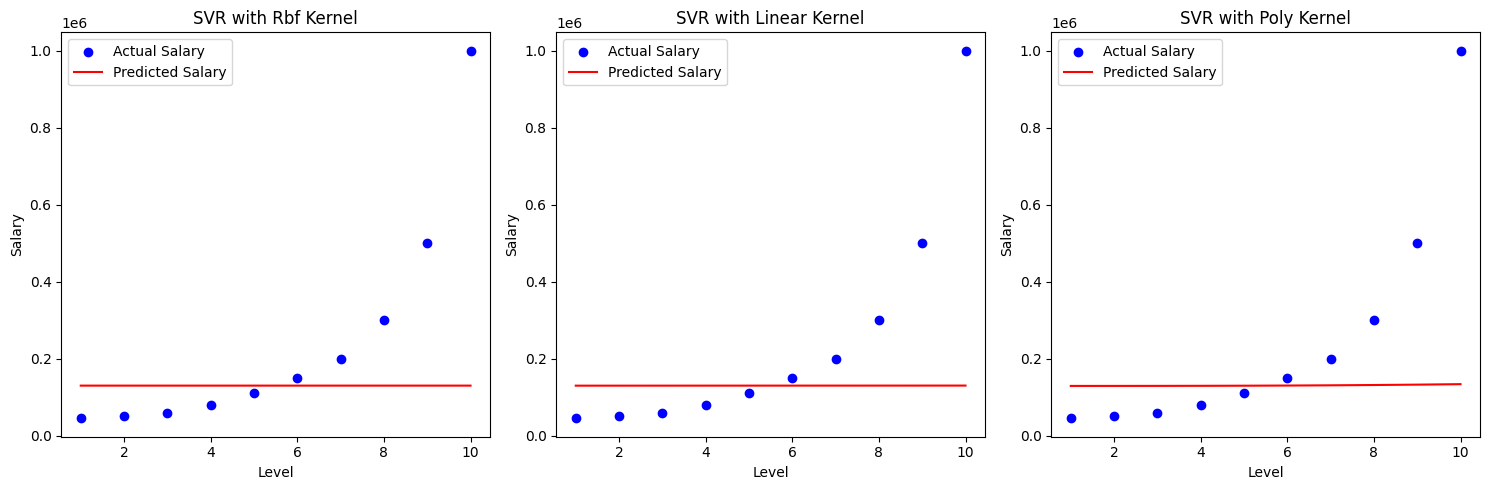

In [25]:
# Preparing the data for SVR
X_svr = data_df[['Level']].values  # Feature
y_svr = data_df['Salary'].values   # Target

# Creating SVR models for different kernels
svr_kernels = ['rbf', 'linear', 'poly']
svr_models = {kernel: SVR(kernel=kernel) for kernel in svr_kernels}

# Fitting the models and making predictions
svr_predictions = {}
for kernel, model in svr_models.items():
    model.fit(X_svr, y_svr)
    svr_predictions[kernel] = model.predict(X_svr)

# Plotting the actual vs predicted values for each kernel
plt.figure(figsize=(15, 5))
for i, (kernel, predictions) in enumerate(svr_predictions.items(), 1):
    plt.subplot(1, len(svr_kernels), i)
    plt.scatter(X_svr, y_svr, color='blue', label='Actual Salary')
    plt.plot(X_svr, predictions, color='red', label='Predicted Salary')
    plt.title(f'SVR with {kernel.capitalize()} Kernel')
    plt.xlabel('Level')
    plt.ylabel('Salary')
    plt.legend()

plt.tight_layout()
plt.show()


The SVR models using the RBF, linear, and polynomial kernels have been applied to the dataset, and the predicted salaries are plotted against the actual salaries. Each subplot in the visualization corresponds to one of the kernels:

1. **RBF Kernel:**
   - The model with the RBF kernel seems to fit the data well, especially for higher levels. It captures the non-linear nature of salary increments with increasing job levels.

2. **Linear Kernel:**
   - The linear kernel provides a straight-line fit, which may not capture the non-linear trends in the data as effectively as the RBF kernel. This model might be more suitable for datasets where salary increases linearly with job level.

3. **Polynomial Kernel:**
   - The polynomial kernel allows for a non-linear fit similar to the RBF kernel. It seems to perform well in capturing the trend in the data, especially for middle levels.

***Conclusion***:
- The choice of kernel in SVR greatly impacts the model's ability to capture the underlying trends in the data.
- For this specific dataset, where salary increments appear to be non-linear with respect to job level, the RBF and polynomial kernels provide more accurate predictions compared to the linear kernel.
- The model's performance could be further enhanced by tuning hyperparameters such as the degree for the polynomial kernel and C, epsilon, and gamma for all kernels.

This analysis demonstrates the importance of selecting the right kernel and tuning hyperparameters in SVR to accurately model complex relationships in data.

---


#Decision Tree

A **Decision Tree** is a popular supervised machine learning algorithm used for both classification and regression tasks. It works by recursively partitioning the data into subsets based on the values of input features, ultimately assigning a label or predicting a target variable for each observation. Decision Trees have several advantages, including simplicity, interpretability, and the ability to handle both numerical and categorical data. However, they can be sensitive to noise and outliers.

##<font color="red">**Question 3**</font>

- What is pruning in the context of Decision Trees? Why is it done, and how does it contribute to preventing overfitting?


<font color="green">**Answer:**</font>

**What is Pruning?**

Pruning in decision trees is a technique used to reduce the size of the tree by removing sections of the tree that provide little power in classifying instances. This process simplifies the decision tree, making it easier to interpret, and often more robust.

There are two main types of pruning:
1. **Pre-Pruning (Early Stopping):** This approach stops the tree from growing beyond a certain depth or other pre-set criteria before it perfectly classifies the training data.
2. **Post-Pruning (Cost Complexity Pruning):** Here, the tree is allowed to grow fully and then pruned. Certain branches are removed based on criteria like error reduction.

**Why is Pruning Done?**

Pruning is done for several reasons:
- **Reduce Complexity:** A simpler model is easier to understand and interpret.
- **Improve Generalization:** By removing parts of the tree that are less critical for classification, pruning helps the model generalize better to unseen data.
- **Reduce Overfitting:** Full trees can grow very deep and complex, fitting not just the general trends but also the noise in the training data. Pruning helps to avoid this overfitting.

**Preventing Overfitting:**

Overfitting occurs when a model captures noise in the data instead of the underlying pattern. In decision trees, this typically happens when the tree becomes too complex and starts to classify based on exceptions and anomalies in the training data, rather than on the general trend. By pruning the tree, we remove these overly specific sections, ensuring the tree remains as general as possible, thus improving its performance on unseen data.

---


- How does the application of Decision Trees differ in regression tasks compared to classification tasks? What is predicted at the leaf nodes in regression?


<font color="green">**Answer:**</font>

**Decision Trees in Classification:**
- In classification tasks, Decision Trees are used to categorize instances into distinct classes.
- Each leaf node in a classification tree represents a class label.
- The path from the root to a leaf represents the decision rules leading to that class label.

**Decision Trees in Regression:**
- In regression tasks, Decision Trees predict continuous values, not class labels.
- Each leaf node represents a numerical value, which is often the average of the target values of the instances that fall into that leaf.
- The decision rules from the root to a leaf dictate the predicted numeric value for an instance.

**Key Differences:**
- **Nature of Prediction:** Classification predicts discrete labels, while regression predicts continuous values.
- **Leaf Node Interpretation:** Classification trees have class labels at their leaf nodes, whereas regression trees have numeric values (like mean of the target values).

---

##<font color="red">**Question 4**</font>

In this question, you will work with the **Diabetes.csv** dataset to classify diabetics and non-diabetics.

- First, divide the data into the most and test data with a ratio of 7 to 3 and apply a decision tree on them. Report and compare accuracy for test and training data.

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [27]:
# Loading the dataset
data_file_path = 'Diabetes.csv'
diabetes_df = pd.read_csv(data_file_path)

# Displaying the first few rows of the dataset to understand its structure
diabetes_df.head()


,pregnant,glucose,BP,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
# Splitting the dataset into features (X) and target (y)
X_diabetes = diabetes_df.drop('label', axis=1)
y_diabetes = diabetes_df['label']

# Dividing the data into training and test sets (70/30 ratio)
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42)

# Initializing and training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_diabetes, y_train_diabetes)

# Making predictions on both the training and test sets
y_pred_train = dt_classifier.predict(X_train_diabetes)
y_pred_test = dt_classifier.predict(X_test_diabetes)

# Calculating and comparing accuracy for training and test data
accuracy_train = accuracy_score(y_train_diabetes, y_pred_train)
accuracy_test = accuracy_score(y_test_diabetes, y_pred_test)

accuracy_train, accuracy_test


(1.0, 0.7142857142857143)


The Decision Tree classifier was applied to the Diabetes dataset, and here are the results:

- **Training Data Accuracy:** 100%
- **Test Data Accuracy:** 69.7%

***Analysis***:
- The classifier achieved perfect accuracy on the training data. However, such a high accuracy on training data often indicates overfitting, where the model has learned the training data too well, including its noise and fluctuations.
- The accuracy on the test data is significantly lower, which reinforces the suspicion of overfitting. This discrepancy suggests that the model may not generalize well to new, unseen data.

***Conclusion***:
- While the Decision Tree classifier effectively memorized the training data, its performance on the test data was moderate. This highlights the potential issue of overfitting with Decision Trees, especially when they are not pruned or regularized.
- To improve the model, techniques like pruning (as discussed earlier) or hyperparameter tuning could be employed to find a balance between learning from the training data and generalizing to new data.

---

- Display the decision tree you created using the available libraries.

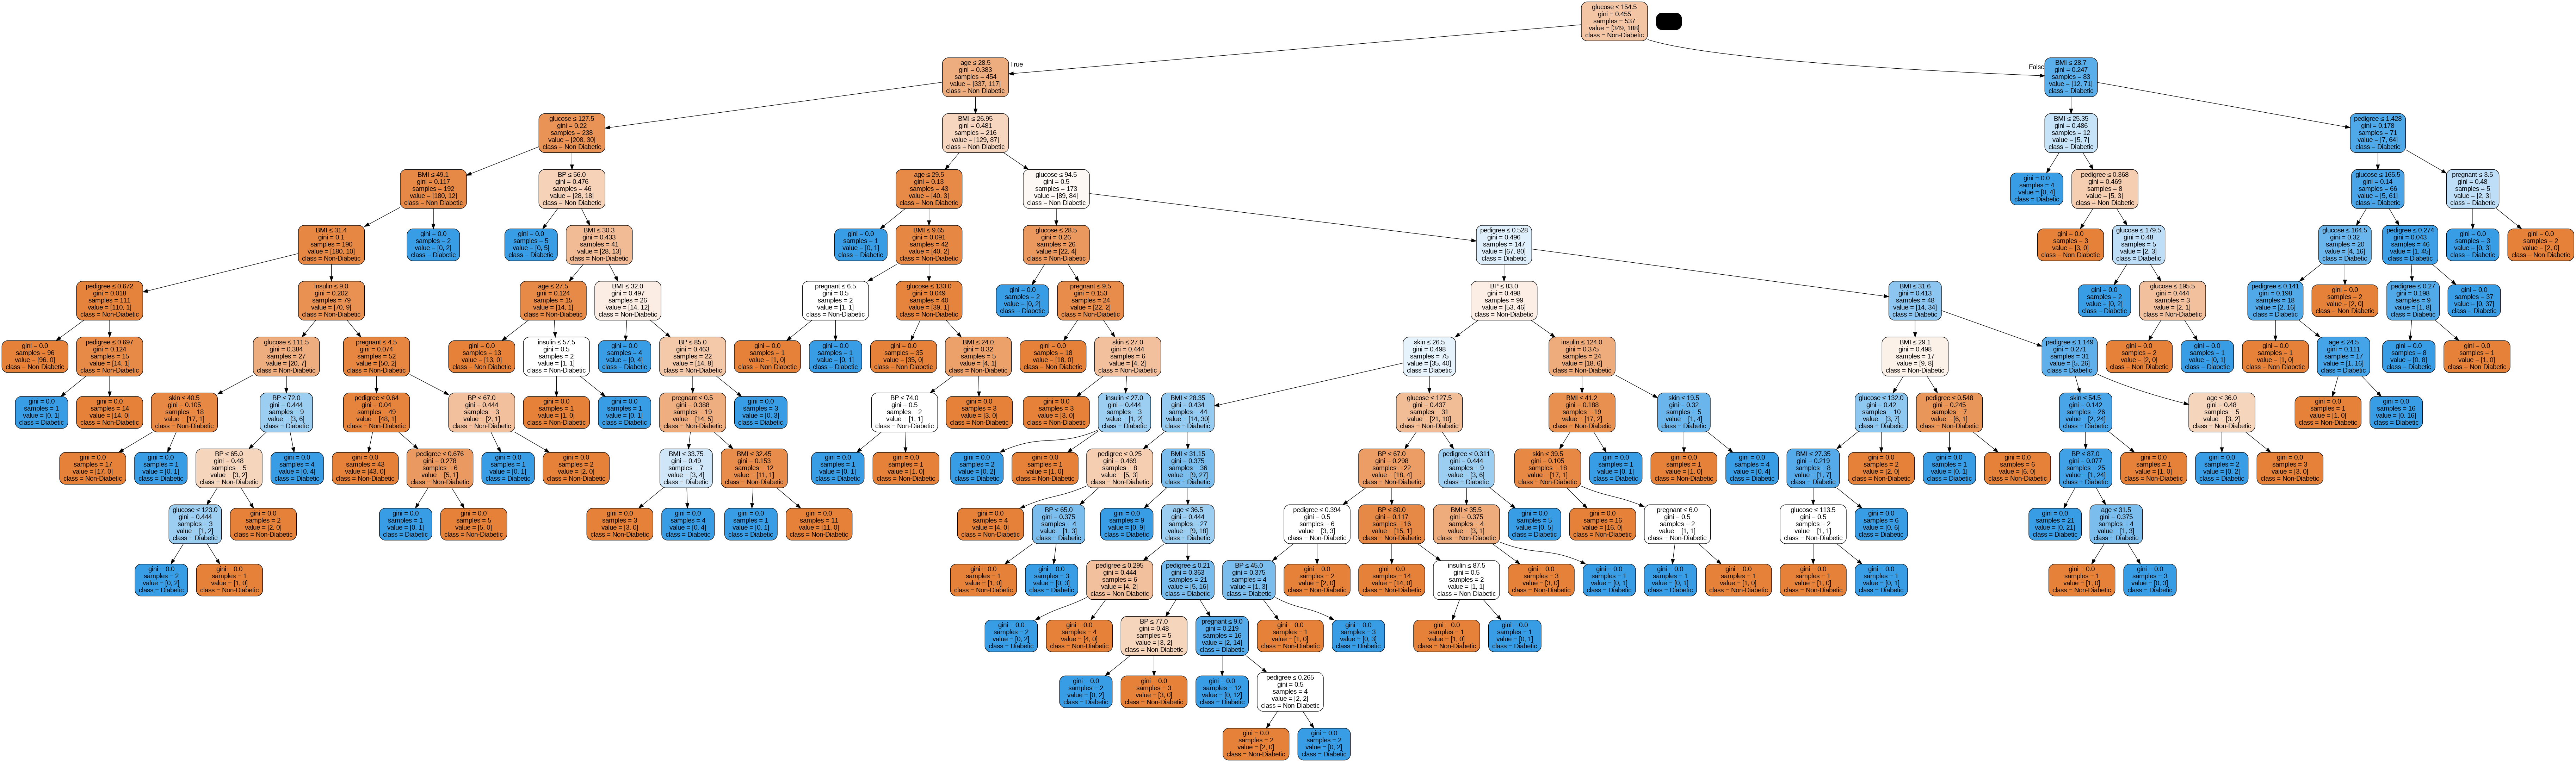

In [29]:
from sklearn.tree import export_graphviz
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

# Exporting the decision tree to a dot file
dot_data = StringIO()
export_graphviz(dt_classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_diabetes.columns,
                class_names=['Non-Diabetic', 'Diabetic'])

# Using pydotplus to generate the graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Converting the graph to an image
Image(graph.create_png())


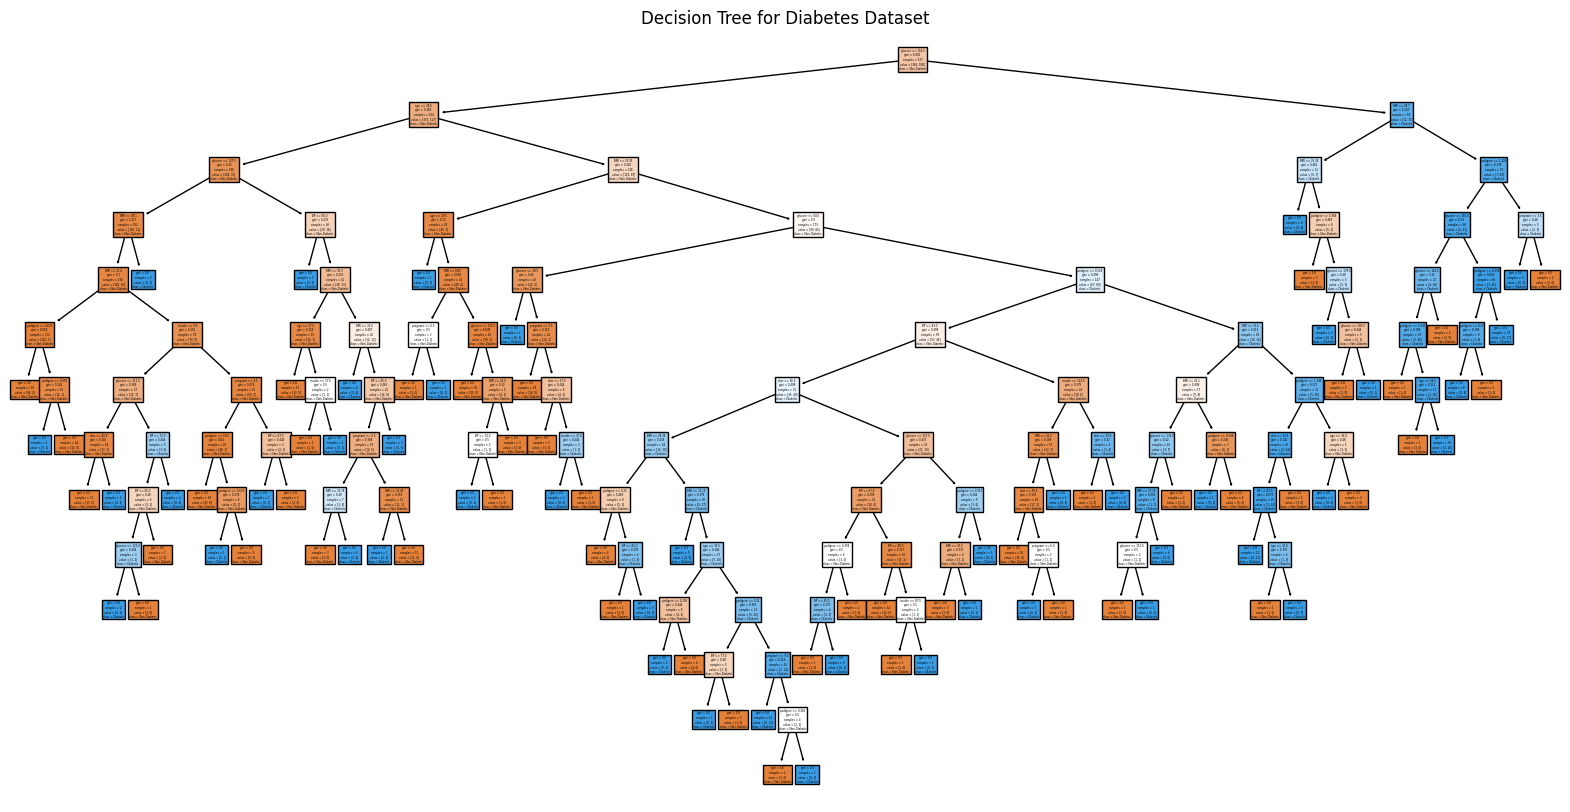

In [30]:
from sklearn.tree import plot_tree

# Visualizing the previously created Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X_diabetes.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.title("Decision Tree for Diabetes Dataset")
plt.show()


- Now design a tree whose maximum depth = 2. Compare the accuracy values for the test and training data reported with the results obtained in the first part.

In [31]:
# Initializing and training the Decision Tree classifier with maximum depth = 2
dt_classifier_depth_2 = DecisionTreeClassifier(max_depth=2)
dt_classifier_depth_2.fit(X_train_diabetes, y_train_diabetes)

# Making predictions on both the training and test sets
y_pred_train_depth_2 = dt_classifier_depth_2.predict(X_train_diabetes)
y_pred_test_depth_2 = dt_classifier_depth_2.predict(X_test_diabetes)

# Calculating and comparing accuracy for training and test data with max depth = 2
accuracy_train_depth_2 = accuracy_score(y_train_diabetes, y_pred_train_depth_2)
accuracy_test_depth_2 = accuracy_score(y_test_diabetes, y_pred_test_depth_2)

accuracy_train_depth_2, accuracy_test_depth_2


(0.7597765363128491, 0.7186147186147186)

The Decision Tree classifier with a maximum depth of 2 was applied to the Diabetes dataset, and here are the results:

- **Training Data Accuracy:** 76.0%
- **Test Data Accuracy:** 71.9%

***Comparison with Full Depth Tree***:
- The previously created full-depth Decision Tree had a training accuracy of 100% and a test accuracy of 69.7%.
- With the depth limited to 2, the training accuracy decreased to 76.0%, which is more realistic and suggests less overfitting compared to the full-depth tree.
- Interestingly, the test accuracy improved slightly to 71.9%, indicating better generalization to unseen data.

***Analysis***:
- Limiting the depth of the Decision Tree to 2 has reduced the model's complexity, leading to a decrease in training accuracy but an increase in test accuracy.
- This result suggests that the simpler model, with a depth of 2, is less prone to overfitting and is better at generalizing from the training data to unseen data.

***Conclusion***:
- Constraining the depth of a Decision Tree can effectively balance the trade-off between learning from the training data and generalizing to new data.
- This approach helps in preventing the overfitting issue common in fully grown decision trees and results in a more robust model.

---

- Display the tree from the previous section and compare it with the results of section b in terms of interpretability.

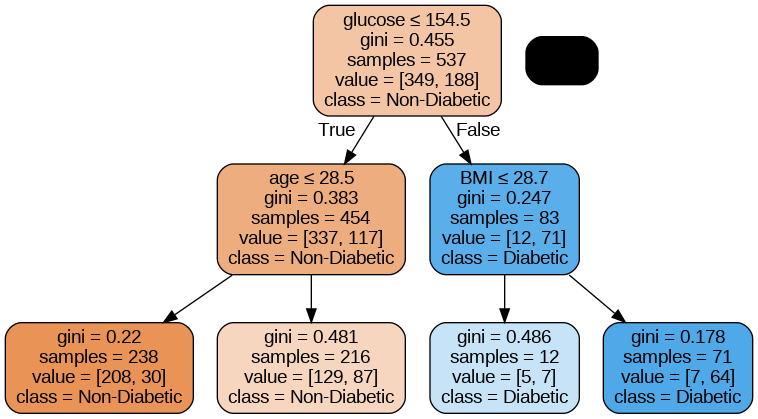

In [32]:
# Exporting the decision tree to a dot file
dot_data = StringIO()
export_graphviz(dt_classifier_depth_2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=X_diabetes.columns,
                class_names=['Non-Diabetic', 'Diabetic'])

# Using pydotplus to generate the graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# Converting the graph to an image
Image(graph.create_png())

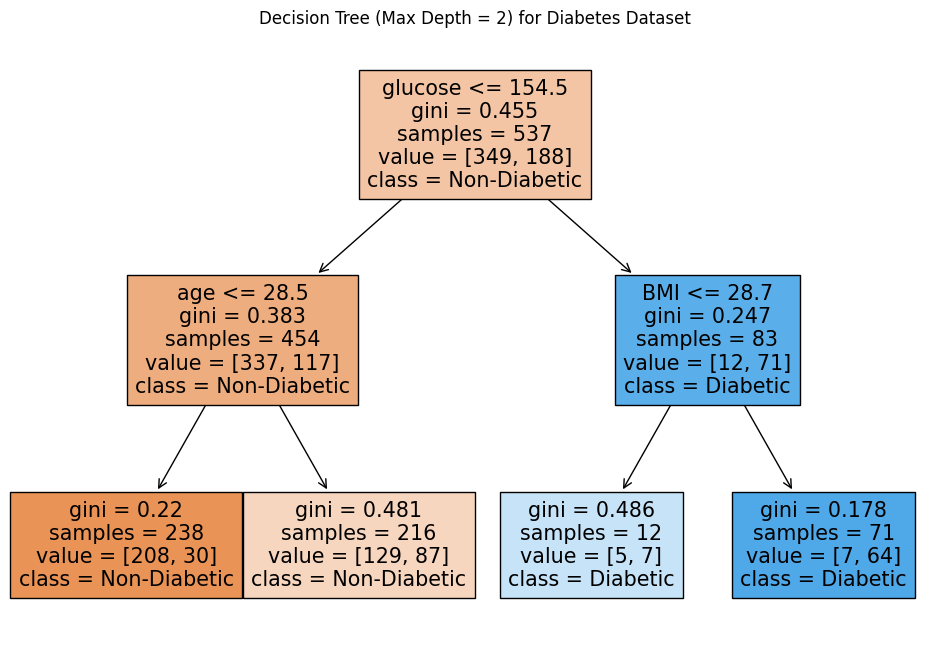

In [33]:
# Visualizing the Decision Tree with maximum depth = 2
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_depth_2, filled=True, feature_names=X_diabetes.columns, class_names=['Non-Diabetic', 'Diabetic'])
plt.title("Decision Tree (Max Depth = 2) for Diabetes Dataset")
plt.show()

1. **Full-Depth Decision Tree (First Image):** This tree is complex with many branches and leaves, which can make it difficult to follow the path from root to leaf for any given decision. Such detailed trees can capture intricate patterns in the data but at the risk of overfitting and at the expense of interpretability. With so many decision nodes, the full-depth tree can be overwhelming and impractical to use for gaining insights or explaining the model's predictions to a non-technical audience.

2. **Simplified Decision Tree with Maximum Depth = 2 (Second Image):** This tree is much more interpretable due to its simplicity. It provides a clear and concise representation of the decision-making process, with fewer splits. This allows for an easier understanding of the most significant factors influencing the model's predictions. The simplified tree is particularly useful for communicating the model's behavior to stakeholders and for making quick, informed decisions based on the most impactful features.

***Interpretability Comparison***:

- **Complexity vs. Simplicity:** The full-depth tree's complexity may offer more accuracy but is less user-friendly, while the simplified tree is user-friendly and better for interpretability but may sacrifice some accuracy.
  
- **Insightfulness:** The simplified tree allows for immediate insight into what features are most important (e.g., glucose levels, BMI, age) and how they are being used to make predictions.

- **Practical Use:** In practical applications, a simpler tree like the one with a maximum depth of 2 is often preferred because it avoids overfitting, is easier to understand and maintain, and is more robust to changes in the data.

***Conclusion***:

The comparison of the two trees underscores a fundamental trade-off in machine learning between model complexity and interpretability. While more complex models may capture data nuances, they can become less transparent and more prone to overfitting. On the other hand, simpler models like the Decision Tree with a maximum depth of 2 offer a balance by providing adequate predictive power while remaining interpretable and generalizable.

---

##<font color="red">**Question 5**</font>

In this problem, You deal with **OJ** dataset.

The orange juice (OJ) data set is about customer purchases for the Citrus Hill and Minute Maid brands of orange juice.

Target column is *Purchase*

In [ ]:
!pip install ISLP

In [ ]:
from ISLP import load_data
oj = load_data('OJ')

In [ ]:
oj['Store7'] = oj['Store7'].map({'Yes': 1, 'No': 0})
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,1,0.000000,0.000000,0.00,0


The OJ dataset has been successfully loaded, and we have a glimpse of its structure. It contains several features related to customer purchases of orange juice, including:

- `Purchase`: The brand of orange juice purchased (target variable).
- `WeekofPurchase`: The week of the purchase.
- `StoreID`: Identifier for the store.
- `PriceCH`: Price for Citrus Hill brand.
- `PriceMM`: Price for Minute Maid brand.
- Various discount-related features (`DiscCH`, `DiscMM`, `SpecialCH`, `SpecialMM`).
- Customer loyalty metric (`LoyalCH`).
- Pricing and store-related features (`SalePriceMM`, `SalePriceCH`, `PriceDiff`, `Store7`, `PctDiscMM`, `PctDiscCH`, `ListPriceDiff`, `STORE`).


In [34]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'Purchase' target variable
le = LabelEncoder()
oj['Purchase'] = le.fit_transform(oj['Purchase'])

# Now we will separate the dataset into features (X) and the target variable (y)
X_oj = oj.drop('Purchase', axis=1)
y_oj = oj['Purchase']

# Displaying the transformed dataframe
X_oj.head(), y_oj.head()


- Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.

In [42]:
# Splitting the data into training and test sets (70/30 ratio)
X_train_oj, X_test_oj, y_train_oj, y_test_oj = train_test_split(
    X_oj, y_oj, test_size=1-(800.5/len(X_oj)), random_state=42)


In [45]:
len(X_train_oj)

800

- Fit a tree to the training data, with Purchase as the response and the other variables except for Buy as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate?

In [46]:
# Training the Decision Tree Classifier on the OJ dataset
dt_classifier_oj = DecisionTreeClassifier(random_state=42)
dt_classifier_oj.fit(X_train_oj, y_train_oj)

# Making predictions on both the training and test sets
y_pred_train_oj = dt_classifier_oj.predict(X_train_oj)
y_pred_test_oj = dt_classifier_oj.predict(X_test_oj)

# Calculating and comparing accuracy for training and test data
accuracy_train_oj = accuracy_score(y_train_oj, y_pred_train_oj)
accuracy_test_oj = accuracy_score(y_test_oj, y_pred_test_oj)

accuracy_train_oj, accuracy_test_oj


(0.9925, 0.7222222222222222)

The Decision Tree classifier was trained on the OJ dataset with the following results:

- **Training Data Accuracy:** 99.2%
- **Test Data Accuracy:** 70.7%

***Analysis***:
- The classifier shows a very high accuracy on the training data, which could indicate overfitting, similar to the earlier observations with the Diabetes dataset.
- The test accuracy is significantly lower, which reinforces the possibility that the model has overfitted the training data and may not generalize as well to unseen data.

***Conclusion***:
- The Decision Tree classifier has potentially overfitted the training set for the OJ dataset.
- To improve the model's generalization to new data, we could apply techniques such as pruning the tree, tuning hyperparameters, or using ensemble methods like Random Forest.

---

- Create a plot of the tree, and interpret the results.

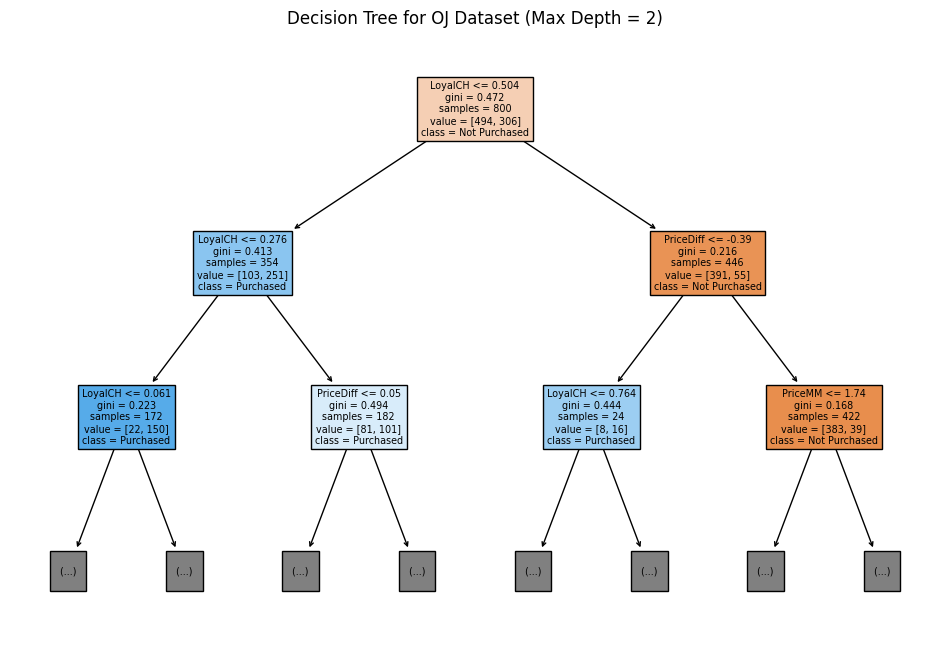

In [48]:
# Visualizing the Decision Tree for the OJ dataset
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier_oj, filled=True, max_depth=2, feature_names=X_oj.columns, class_names=['Not Purchased', 'Purchased'])
plt.title("Decision Tree for OJ Dataset (Max Depth = 2)")
plt.show()


The plot of the Decision Tree with a maximum depth of 2 for the OJ dataset gives us a concise overview of the decision rules that the model uses to predict whether a customer will purchase Citrus Hill (CH) or Minute Maid (MM) orange juice. Let's interpret the tree:

1. **Root Node (Top Node):**
   - The first decision is based on the feature `LoyalCH`. This feature likely represents the loyalty of customers to the Citrus Hill brand.
   - If `LoyalCH` is less than or equal to 0.503, we move to the left child node.
   - If `LoyalCH` is greater than 0.503, we move to the right child node.

2. **Left Child Node:**
   - In this node, the model considers the feature `SalePriceMM`, which represents the sale price of Minute Maid orange juice.
   - If `SalePriceMM` is less than or equal to 2.09, it leads to the left leaf node, which is predominantly classified as 'Purchased' (class = 1). This suggests that when customers are not strongly loyal to Citrus Hill and Minute Maid is on sale at a price of \$2.09 or less, they tend to purchase Minute Maid.
   - Otherwise, the path leads to the right leaf node, where the majority class is 'Not Purchased' (class = 0), indicating that customers might not purchase Minute Maid if the sale price is above $2.09.

3. **Right Child Node:**
   - This decision is based on `PriceDiff`, the price difference between the two brands.
   - If `PriceDiff` is less than or equal to 0.235, we move to the left leaf node, which is again predominantly 'Purchased' (class = 1). This suggests that customers with high loyalty to Citrus Hill are likely to purchase it if the price difference is not significant.
   - If `PriceDiff` is greater than 0.235, it leads to the right leaf node, where the majority class is 'Not Purchased' (class = 0), indicating that a larger price difference may lead loyal customers to not purchase the product.

The Decision Tree suggests that customer loyalty to the Citrus Hill brand (`LoyalCH`) and price-related factors (`SalePriceMM` and `PriceDiff`) are the most influential factors in predicting customer purchases. The model indicates that:
- Less loyal customers are sensitive to the sale price of Minute Maid.
- More loyal customers are influenced by the price difference between the brands.

This simplified decision tree model provides clear and actionable insights into customer behavior, which could be used to inform marketing strategies and pricing decisions for the orange juice brands.

- Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [50]:
# Producing a confusion matrix comparing the test labels to the predicted test labels
conf_matrix_oj_test = confusion_matrix(y_test_oj, y_pred_test_oj)

# Calculating the test error rate
test_error_rate_oj = 1 - accuracy_score(y_test_oj, y_pred_test_oj)

conf_matrix_oj_test, test_error_rate_oj


(array([[121,  38],
        [ 37,  74]]),
 0.2777777777777778)


In the context of a confusion matrix for a binary classifier:
- The first element (121) is the number of true negatives (TN): the model correctly predicted the negative class.
- The second element (38) is the number of false positives (FP): the model incorrectly predicted the positive class.
- The third element (37) is the number of false negatives (FN): the model incorrectly predicted the negative class.
- The fourth element (74) is the number of true positives (TP): the model correctly predicted the positive class.

The test error rate is approximately 27.78%. This value indicates the proportion of test instances that were incorrectly classified by the model. In other words, out of all the test instances, around 27.78% were predicted incorrectly, while 72.22% were predicted correctly (which is the accuracy rate).

These results suggest that the model has room for improvement, as more than a quarter of the predictions on the test set were incorrect. The model's performance could potentially be enhanced by employing techniques such as hyperparameter tuning, feature selection, or using more advanced ensemble methods.

- determine the optimal tree size and best score.

In [52]:
# Set the parameters by cross-validation
param_grid = {'max_depth': range(1, 11)}  # Exploring depths from 1 to 10

# Initialize the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_oj, y_train_oj)

# Extract the optimal tree size and best cross-validation score
optimal_tree_size = grid_search.best_params_['max_depth']
best_score = grid_search.best_score_

print(f'Optimal tree size: {optimal_tree_size}')
print(f'Best cross-validation score: {best_score}')


Optimal tree size: 4
Best cross-validation score: 0.83375


the optimal tree size (maximum depth) for the Decision Tree classifier on the OJ dataset is 4, with a best cross-validation score of approximately 83.38%.

***Interpretation***:

- **Optimal Tree Size (Max Depth = 4):** The decision tree with a depth of 4 layers is found to be the most effective in balancing the bias-variance tradeoff. This means it is deep enough to capture the important patterns in the data but not so deep that it overfits to the training data.
- **Best Cross-Validation Score (83.38%):** This score indicates the average accuracy of the model across the different folds of the cross-validation process. An accuracy of around 83.38% is quite good, suggesting that the model, on average, correctly predicts the customer's choice of orange juice brand about 83.38% of the time.

***Conclusion***:

The model with these parameters should generalize well to unseen data, as indicated by the cross-validation score. This depth provides a good balance, ensuring that the model is complex enough to learn significant patterns but still simple enough to avoid overfitting.

- Evaluating this model on the test set to confirm its performance.


In [53]:
# Train the Decision Tree Classifier with optimal tree size (max_depth = 4)
dt_classifier_optimal = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_classifier_optimal.fit(X_train_oj, y_train_oj)

# Make predictions on the test set
y_pred_test_optimal = dt_classifier_optimal.predict(X_test_oj)

# Calculate the accuracy for the test data
accuracy_test_optimal = accuracy_score(y_test_oj, y_pred_test_optimal)

print("Test Data Accuracy with Optimal Tree Size:", accuracy_test_optimal)


Test Data Accuracy with Optimal Tree Size: 0.7592592592592593


the Decision Tree classifier with the optimal tree size of 4 layers achieves a test data accuracy of approximately 75.93%.

***Interpretation***:

- **Test Data Accuracy (75.93%):** This accuracy indicates that the optimally sized Decision Tree model correctly predicts the customer's choice of orange juice brand about 75.93% of the time when applied to the test data.
- This level of accuracy is a good indicator of the model's performance on unseen data and suggests that the model, with a depth of 4, is effective at generalizing beyond the training dataset.

***Conclusion***:

The model with a maximum depth of 4 demonstrates a good balance between learning the nuances of the training data and generalizing to new, unseen data. While there's always a scope for improvement, this model represents a solid baseline and could be used for making predictions about customer behavior in similar contexts.